<h4> Simplification of Model to 2nd order</h4>

$$T_{d0}' \frac{dE_q'}{dt} = - E_q' - (X_d - X_d') I_d + E_{fd}$$
$$T_{q0}' \frac{dE_d'}{dt} = -E_d' + (X_q - X_q')I_q$$

$$\frac{d\delta}{dt} = \omega - \omega_s$$

$$\frac{d\Delta\omega}{dt} = [T_m - T_{ei}]$$

$$T_{ei} = [ E_q'I_q + E_d'I_d + (X_q'-X_d')I_dI_q]$$

$$V_g sin(\delta) = E_d' + X_q'I_q$$

$$V_g cos(\delta) = E_q' - X_d'I_d$$

Assuming $R_s = 0$

Refer: Power system dynamics and stability/Peter W Sauer and MA Pai


Ignoring the dynamics of $E_d', E_q'$ as it decys much faster than mechanical transients $\delta, \omega$, so they can be approximated as instantaneous or constant. The classical model represents the machine as a constant voltage behind a transient reactance. Here’s how to reduce it:
a. Neglecting Electrical Transients
b. Constant voltage behind Transient Reactance: Replacing the dynamic $E_q', E_d'$ with a constant internal Voltage $E'$ typicall alinged with q-axis, behind the transient reactance $X_d'$ given as:

$$E' = \sqrt{E_q'^2 + E_d'^2}$$

c. Neglecting Damping windings and sub transient effects: Ignore sub transient reactances $X''_d,X''_q$ and assume $X'_q \approx X'_d$ for simplicity

d. Simplified power output 

$$P_e = \frac{E'V}{X'_d}sin(\delta)$$







In [1]:
%load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from Initialization import find_initial
from Non_linear_solution import get_nonlinear_solution
import numpy as np
from matplotlib.pyplot import plot,legend

Xd = 1.2          # Unsaturated d-axis synchronous reactance (pu)
Xq = 1.1          # Unsaturated q-axis synchronous reactance (pu)
Xdd = 0.3   # Saturated d-axis transient reactance (pu)
Xqd = 0.7   # Corrected q-axis transient reactance (pu)

H = 6.0            # Inertia constant (s)
Rs = 0.00         # Stator resistance (pu)
Vg = 1.0           # Grid voltage (pu)
ws = 1.0      # Synchronous speed (pu)
Tm = 0.8
Ef = 1.2
Tdod = 5  # d-axis open-circuit transient time constant (s)
Tqod = 0.6    # q-axis open-circuit transient time constant (s)
D = 5
input_vector = np.array([Tm,Ef,Vg,ws])
machine_param = np.array([Xd,Xq,Xdd,Xqd,Tdod,Tqod,H,D])

### Finding initial equilibrium point

As we observed, that the system is stabilized in steady state mentioned. This is the steady state of machine. 
We can determine this steady state by solving the algebraic equation for steady state

In [3]:
alg0,X0 = find_initial(machine_param,input_vector)

Steady state value: delta0,w0,edd0,eqd0: [0.86736798 1.         0.27731967 0.78512703]
Steady state algebraic solution: [0.46096996 0.69329917]


### Solving the system reaching on steady state with some pertubation or disturbance
Lets apply some transient input in system. Lets change the field excitation at time 70 seconds to value of 1.4 pu. Now the iniital condition for the system will be X0 and we change the input vector as per

In [4]:
t0 = 70
t = 140
x0 = X0 #initial state is previous steady state condition
input_vector_perturb = np.array([Tm,Ef+0.2,Vg,ws])
tnl,ynl = get_nonlinear_solution(x0,machine_param=machine_param,input_vector=input_vector_perturb,t0=t0,t=t)
deltanl,wnl,eddnl,eqdnl = ynl

Machine parameters: [1.2 1.1 0.3 0.7 5.  0.6 6.  5. ]
Inpute Vector: [0.8 1.4 1.  1. ]
Initial Condition [0.86736798 1.         0.27731967 0.78512703]
Steady State Value: [0.71232036 1.00000534 0.23753295 0.91763396]


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Deependra\AppData\Local\Temp\ipykernel_3280\3074880606.py:4: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_ylabel('$\delta$')
C:\Users\Deependra\AppData\Local\Temp\ipykernel_3280\3074880606.py:7: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_ylabel('$\omega$')


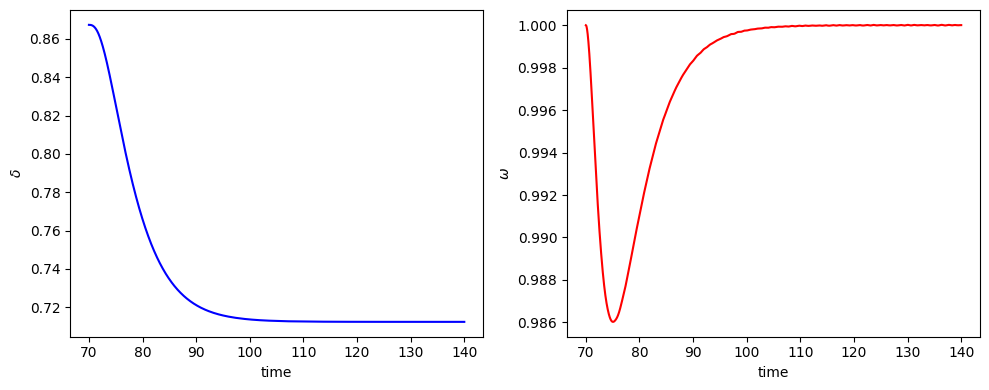

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
ax1.plot(tnl, deltanl, color='blue')
ax1.set_xlabel('time')
ax1.set_ylabel('$\delta$')
ax2.plot(tnl, wnl, color='red')
ax2.set_xlabel('time')
ax2.set_ylabel('$\omega$')
fig.tight_layout()
plt.show()

#### Linearization at steady state point
The system is equation is non linear. For control system design we have to linearize the system at steady state condtion i.e at X0

In [6]:
from Linearization import get_state_matrix,get_linear_solution

In [7]:
A,B = get_state_matrix(X0,machine_param,input_vector,alg0)

In [8]:
# Perturbation: Increase Ef by additional 0.2
Ef_perturbed = Ef + 0.2
u_eq = np.array([Tm, Ef, Vg, ws])
u_perturbed = np.array([Tm, Ef_perturbed, Vg, ws])
delta_u = u_perturbed - u_eq

# 1. Linearized system
def linear_system(t, x):
    return A @ x + B @ delta_u

x0_linear = np.array([0.0, 0.0, 0.0, 0.0]) 

t0 = 70
t = 140

tl,yl = get_linear_solution(A,B,x0_linear,delta_u,t0,t)
deltal,wl,eddl,eqdl = yl

delta0, w0, edd0,eqd0 = X0

Initial Condition [0. 0. 0. 0.]
Steady State Value: [-2.00184335e-01 -1.46392060e-05 -4.71222732e-02  1.64486249e-01]


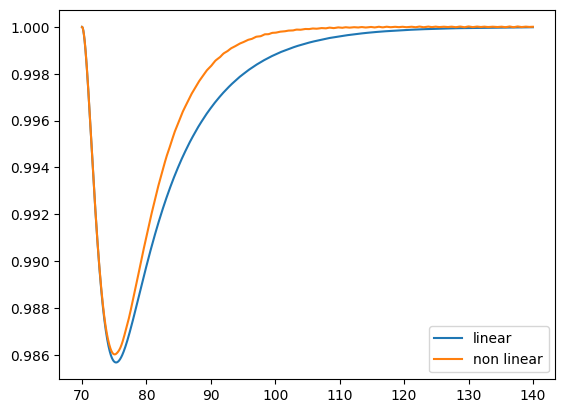

In [9]:
plot(tl,wl+ w0,label = 'linear')
plot(tnl,wnl,label = 'non linear')
legend()